<a href="https://colab.research.google.com/github/VinayakDubey07/Machine-learning/blob/main/ML_LAB_6%20%5BUpdated%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [23]:
X=iris.data[:,2:]
y=iris.target

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
dt=tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [41]:
y_pred=dt.predict(X_test)

[Text(0.4, 0.8333333333333334, 'X[1] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

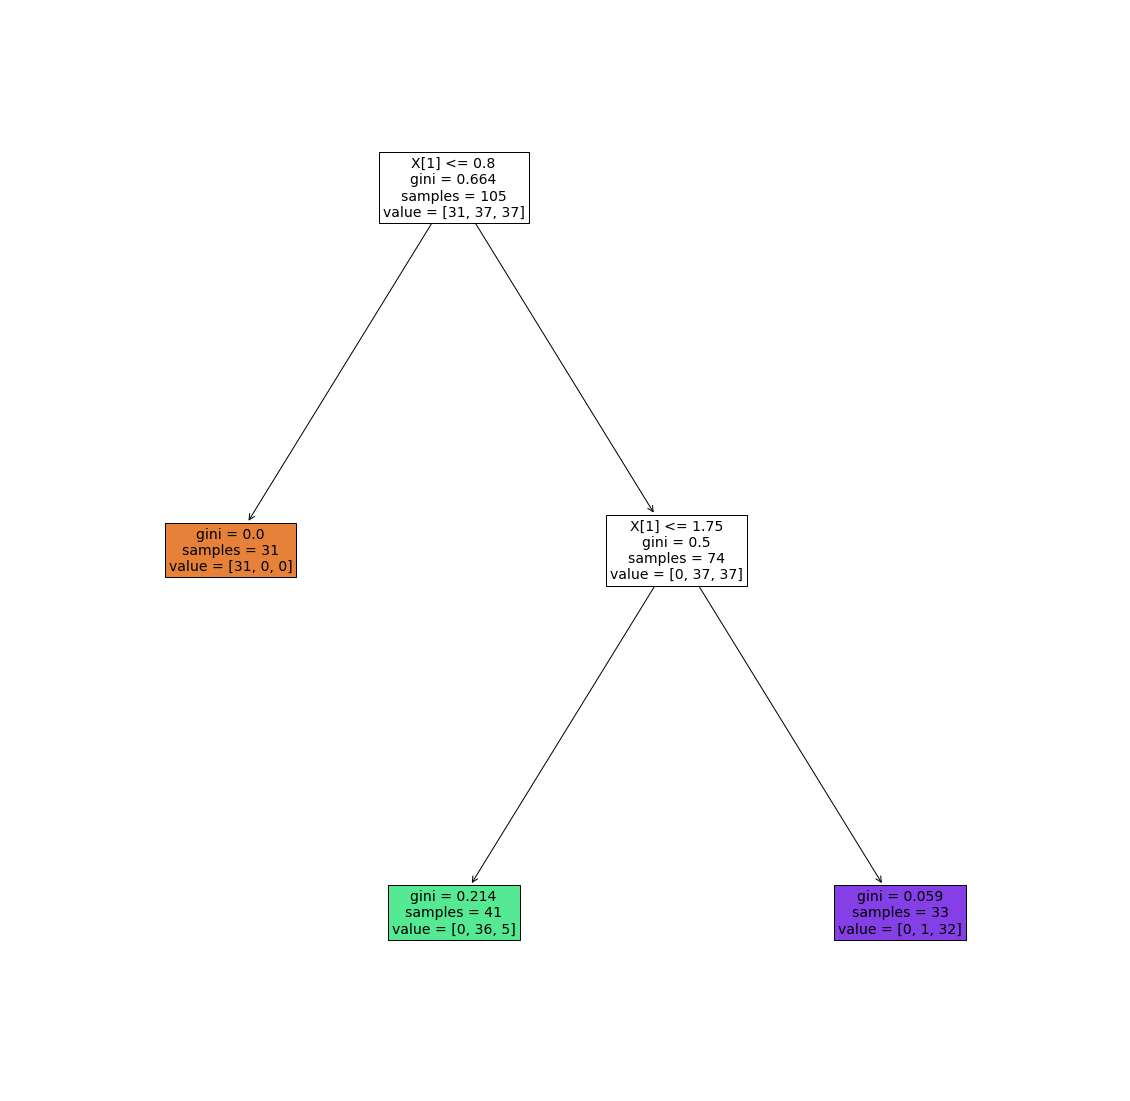

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
tree.plot_tree(dt, filled=True, fontsize=14)

In [43]:
dt.predict([[5,1.5]])

array([1])

In [44]:
from sklearn.tree import export_graphviz
export_graphviz(
dt,
out_file="iris.dot",
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True
)

In [45]:
%ls

iris1_tree.png  iris.dot  iris_tree.dot  sample_data/


In [46]:
!dot -Tpng iris_tree.dot -o iris1_tree.png

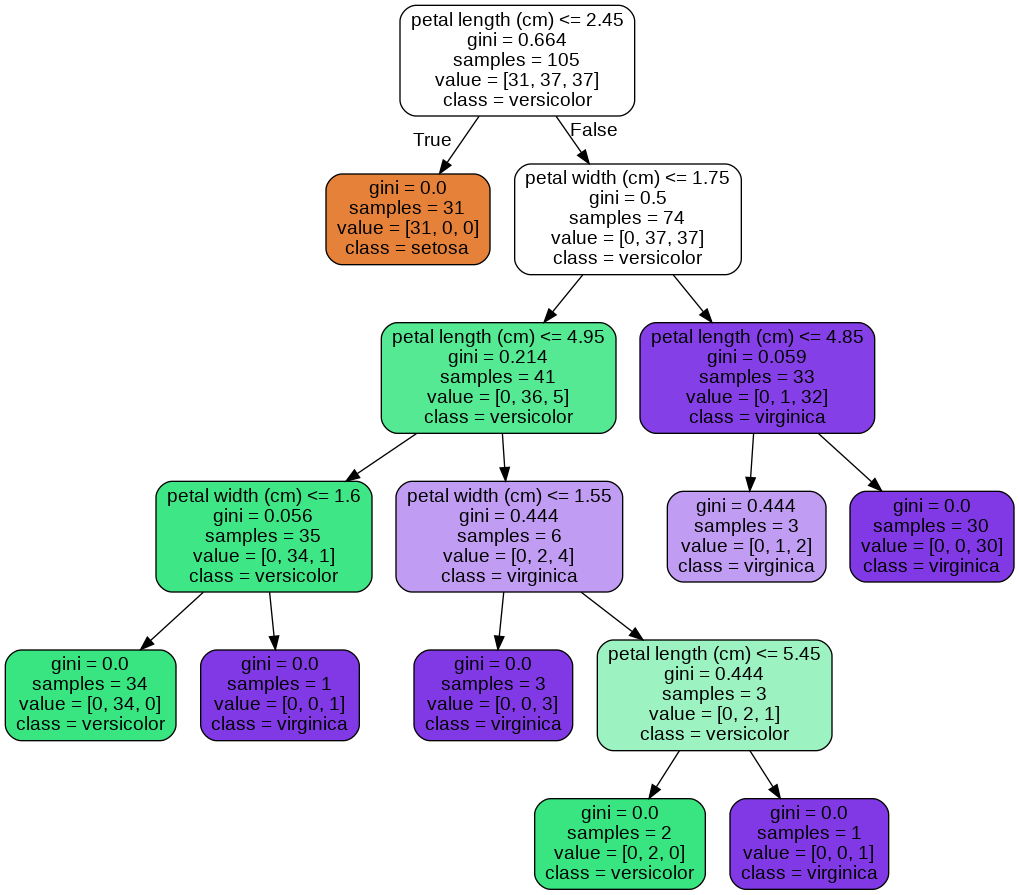

In [47]:
from IPython.display import Image
Image(filename = 'iris1_tree.png')

In [48]:
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,confusion_matrix
print("confusion matrix\n", confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

confusion matrix
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [49]:
dt.predict_proba([[5,1.5]])

array([[0.        , 0.87804878, 0.12195122]])